In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.cnn import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient_array, eval_numerical_gradient
from cs231n.layers import *
from cs231n.fast_layers import *
from cs231n.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [2]:
# Load the (preprocessed) CIFAR10 data.
DIR_CS231n = ''
data = get_CIFAR10_data(DIR_CS231n)
for k, v in data.iteritems():
  print '%s: ' % k, v.shape

X_val:  (1000, 3, 32, 32)
X_train:  (49000, 3, 32, 32)
X_test:  (1000, 3, 32, 32)
y_val:  (1000,)
y_train:  (49000,)
y_test:  (1000,)


In [3]:
num_train = 1000
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

model = ThreeLayerConvNet(weight_scale=0.001, num_filters = 64, hidden_dim=500, reg=0.001, filter_size = 3,use_batchnorm=True)

solver = Solver(model, small_data,
                num_epochs=1, batch_size=50,
                update_rule='adam',
                optim_config={
                  'learning_rate': 1e-3,
                },
                verbose=True, print_every=20)
solver.train()

We use batchnorm here
(Iteration 1 / 20) loss: 2.306642
(Epoch 0 / 1) train acc: 0.144000; val_acc: 0.141000
(Epoch 1 / 1) train acc: 0.363000; val_acc: 0.320000


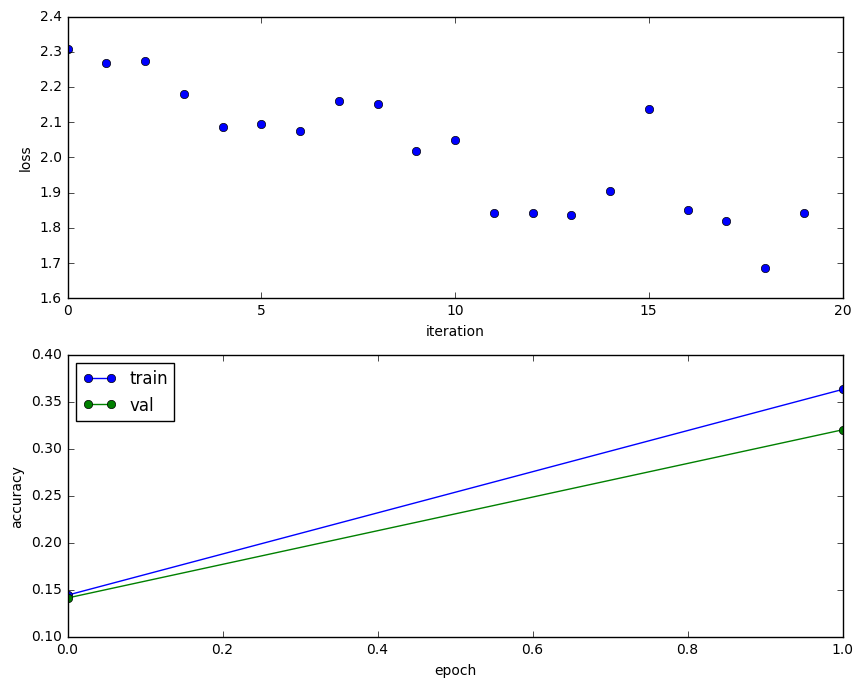

In [4]:
plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

We use batchnorm here
(Iteration 1 / 19600) loss: 2.307210
(Epoch 0 / 20) train acc: 0.120000; val_acc: 0.107000
(Iteration 21 / 19600) loss: 5.469501
(Iteration 41 / 19600) loss: 2.909189
(Iteration 61 / 19600) loss: 2.945478
(Iteration 81 / 19600) loss: 2.513102
(Iteration 101 / 19600) loss: 2.759288
(Iteration 121 / 19600) loss: 2.599365
(Iteration 141 / 19600) loss: 2.689064
(Iteration 161 / 19600) loss: 2.632929
(Iteration 181 / 19600) loss: 2.790299
(Iteration 201 / 19600) loss: 2.501873
(Iteration 221 / 19600) loss: 2.405019
(Iteration 241 / 19600) loss: 2.676404
(Iteration 261 / 19600) loss: 2.310655
(Iteration 281 / 19600) loss: 2.523760
(Iteration 301 / 19600) loss: 2.741991
(Iteration 321 / 19600) loss: 2.495239
(Iteration 341 / 19600) loss: 2.306381
(Iteration 361 / 19600) loss: 2.465606
(Iteration 381 / 19600) loss: 2.505915
(Iteration 401 / 19600) loss: 2.418191
(Iteration 421 / 19600) loss: 2.379155
(Iteration 441 / 19600) loss: 2.661464
(Iteration 461 / 19600) loss: 2.2

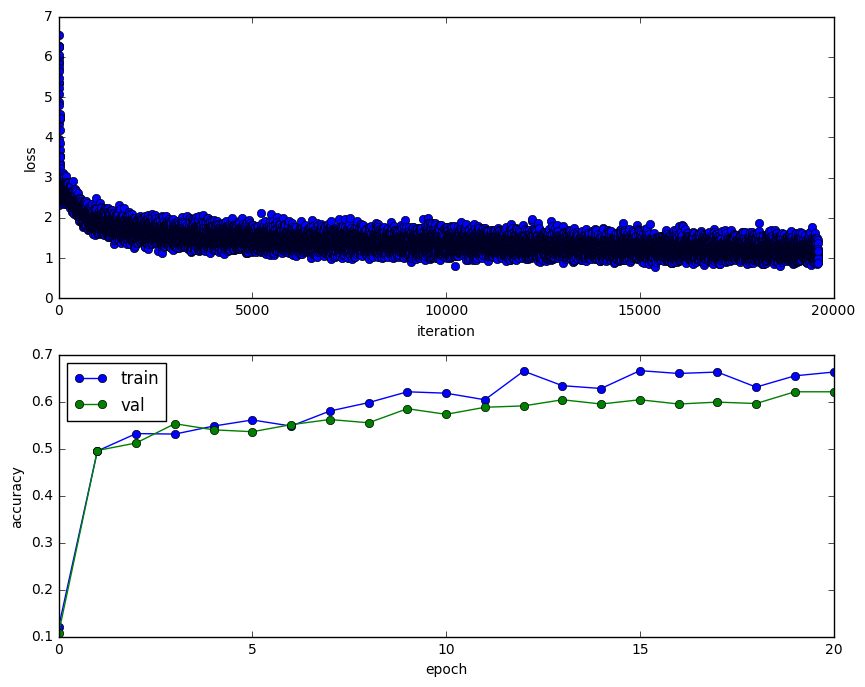

In [20]:
model = ThreeLayerConvNet(weight_scale=0.001, num_filters = 64, hidden_dim=500, reg=0.001, filter_size = 3, use_batchnorm=True)

solver = Solver(model, data,
                num_epochs=20, batch_size=50,
                update_rule='adam',
                optim_config={
                  'learning_rate': 1e-2,
                },lr_decay=0.95,
                verbose=True, print_every=20)
solver.train()

plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()